#Handwritten Digits Prediction

## Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

##Import Dataset

In [5]:
from sklearn.datasets import load_digits

In [6]:
df=load_digits()

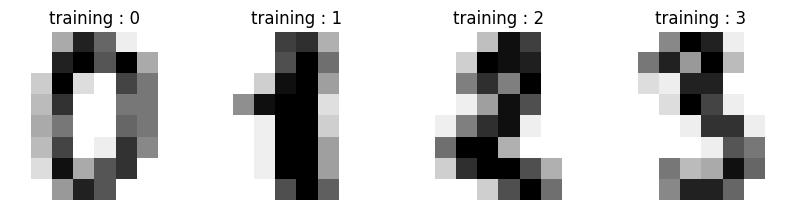

In [8]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("training : %i"%label)

##Flatten Image

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
nsamples=len(df.images)
data=df.images.reshape((nsamples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape


(64,)

In [16]:
data.shape

(1797, 64)

##Scaling Image data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data/=16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##Train Test Split Data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

##Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [28]:
model.fit(x_train,y_train)

RandomForestClassifier()

## Predict test data

In [29]:
y_pred=model.predict(x_test)

##Accuracy Testing

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
confusion_matrix(y_test,y_pred)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 57,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 55,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1,  0, 54]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.94      1.00      0.97        46
           2       1.00      0.95      0.97        60
           3       0.98      0.95      0.96        58
           4       1.00      0.98      0.99        50
           5       0.96      0.98      0.97        56
           6       1.00      0.98      0.99        55
           7       0.95      1.00      0.97        57
           8       0.98      0.98      0.98        51
           9       0.96      0.93      0.95        58

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.97      0.97      0.97       540



In [38]:
accuracy_score(y_test,y_pred)

0.9740740740740741